# Lensing figures

Previously, I used the script `figure_routines.py` to create figures for the cluster lensing analysis. This notebook is being created to replace that.

In [3]:
import numpy as np
from helper_functions import *
from models import *
import os, sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import blinding
import cluster_toolkit as clusterwl

In [4]:
#plt.rc("text", usetex=True)
plt.rc("font", size=20, family="serif")
plt.rc("errorbar", capsize=3)

In [5]:
#Varous labels
DSlabel = r"$\Delta\Sigma\ [{\rm M}_\odot$/pc$^2$]"
Rlabel  = r"$R\ [{\rm Mpc}]$"

y1zlabels = [r"$z\in[0.2;0.35)$", r"$z\in[0.35;0.5)$", r"$z\in[0.5;0.65)$"]
y1llabels = [r"$\lambda\in[5;10)$",r"$\lambda\in[10;14)$",r"$\lambda\in[14;20)$",
             r"$\lambda\in[20;30)$",r"$\lambda\in[30;45)$",r"$\lambda\in[45;60)$",
             r"$\lambda\in[60;\infty)$"]

svzlabels = [r"$z\in[0.2,0.4)$",r"$z\in[0.4,0.6)$",r"$z\in[0.6,0.8)$"]
svllabels = [r"$\lambda\in[5;10)$",r"$\lambda\in[10;14)$",r"$\lambda\in[14;20)$",
             r"$\lambda\in[20;35)$",r"$\lambda\in[35;180)$"]

In [6]:
#Example of data to use
model_name = "full"
name = "Y1"
zi, lj = 0, 3
blinded = False
args = get_args(model_name, zi, lj, name, "SAC", blinded)

('unmodified Bcov: ', array([6.61284244e-05, 2.84565524e-05, 1.80935411e-05, 1.41297254e-05,
       1.19632655e-05, 9.08484519e-06, 5.60752381e-06, 2.94660105e-06,
       1.30479707e-06, 2.60806881e-07]))
('Hartlap factor: ', 1.125)
	'name':Y1 supplied, using a pre-defined cosmology.


In [25]:
#Set up the assumptions
h = args['h'] #Hubble constant
om = args['Omega_m']
z = args["z"]
lam = args["lam"]

Text(0,0.5,'$\\Delta\\Sigma\\ [{\\rm M}_\\odot$/pc$^2$]')

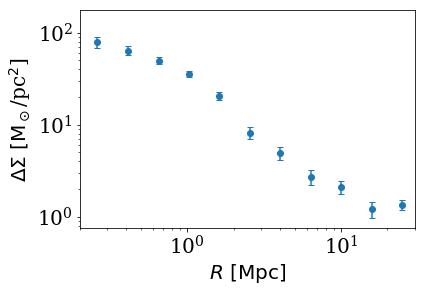

In [26]:
def add_lensing_data_to_axis(ax, args):
    R = args["R_all"]
    R_cut = args["R_cut"]
    DS_all = args["DeltaSigma_all"]
    DS_cut = args["DeltaSigma_cut"]
    DSe_all = np.sqrt(args["C_all"].diagonal())
    ax.errorbar(R, DS_all, DSe_all, ls="", marker='o')
    return
fig, ax = plt.subplots()
add_lensing_data_to_axis(ax, args)
ax.loglog()
xlim = ax.set_xlim(0.2, 30.)
ax.set_xlabel(Rlabel)
ax.set_ylabel(DSlabel)

In [17]:
def get_best_unblinded_parameters(zi, lj):
    mean_parameters_all_stacks = np.load("chains/parameter_means.npy")
    return mean_parameters_all_stacks[zi, lj-3]

def get_bestfit_model(zi, lj, args):
    params = get_best_unblinded_parameters(zi, lj)
    print(params)
    Rp, Sigma, Sigma_mis, DeltaSigma, DeltaSigma_mis, \
        full_DeltaSigma, ave_DeltaSigma, boost_model = get_delta_sigma(params, args)
    return Rp, Sigma, Sigma_mis, DeltaSigma, DeltaSigma_mis, full_DeltaSigma, ave_DeltaSigma, boost_model

[14.0317582   5.81270129  0.17258234  0.27972637  1.02462786  0.34299125
  0.43786744]


Text(0,0.5,'$\\Delta\\Sigma\\ [{\\rm M}_\\odot$/pc$^2$]')

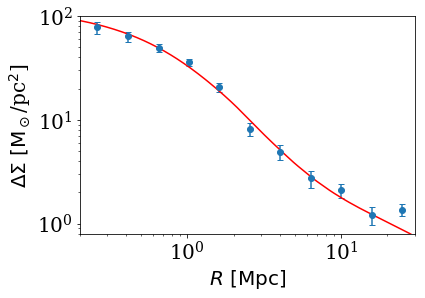

In [29]:
def add_bestfit_model_to_axis(ax, zi, lj, args):
    Rp, Sigma, Sigma_mis, DeltaSigma, DeltaSigma_mis, \
        full_DeltaSigma, ave_DeltaSigma, boost_model = get_bestfit_model(zi, lj, args)
    ax.plot(Rp/(h*(1+z)), full_DeltaSigma*h*(1+z)**2, c='r')
    return
fig, ax = plt.subplots()
add_lensing_data_to_axis(ax, args)
add_bestfit_model_to_axis(ax, zi, lj, args)
ax.loglog()
xlim = ax.set_xlim(0.2, 30.)
ylim = ax.set_ylim(.8, 1e2)
ax.set_xlabel(Rlabel)
ax.set_ylabel(DSlabel)